**Wrongful Conviction**
============================

Updated from previous workbook. Fixed many issues and standardized to follow common industry practices

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
# Read Data

wrongCon_df = pd.read_csv(...\Wrongful Convictions in the United States.csv")

### EDA

##### Shape and First 5 rows

In [109]:
print(wrongCon_df.shape)
wrongCon_df.head()


(178, 8)


,Unnamed: 0,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
0,0,1805,Dominic Daley and James Halligan,murder,Massachusetts,death,yes,1
1,1,1843,John Gordon,murder,Rhode Island,death,yes,1
2,2,1855,Chief Leschi,murder,Washington,death,no,0
3,3,1863,Chipita Rodriguez,murder,Texas,death,yes,1
4,4,1872,William Jackson Marion,murder,Nebraska,death,yes,1


##### Columns info and Data types

In [110]:
wrongCon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  178 non-null    int64 
 1   Date of the Crime           178 non-null    int64 
 2   Defendants                  178 non-null    object
 3   Type of the Crime           178 non-null    object
 4   Location of the Crime       178 non-null    object
 5   Punishment for a crime      169 non-null    object
 6   Legally Exonerated          178 non-null    object
 7   Legally Exonerated Encoded  178 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 11.2+ KB


##### NaN values check

In [111]:
wrongCon_df.isna().sum()

Unnamed: 0                    0
Date of the Crime             0
Defendants                    0
Type of the Crime             0
Location of the Crime         0
Punishment for a crime        9
Legally Exonerated            0
Legally Exonerated Encoded    0
dtype: int64

##### NaN rows print
Punishment for a crime have 9 NaN values, I will check if they are significant for the analysis 

In [112]:
wrongCon_df[wrongCon_df.isna().any(axis=1)]

,Unnamed: 0,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
7,7,1894,George Washington Davis,sabotage of Locomotive 213,Nebraska,NaN,yes,1
9,9,1900,Caleb Powers,murder,Kentucky,NaN,yes,1
50,50,1980,Steve Titus,rape,Washington,NaN,yes,1
52,52,1980,Kern County child abuse cases,satanic ritual sex abuse,California,NaN,yes,1
71,71,1984,Employees of Fells Acres Day Care,satanic ritual sex abuse,Massachusetts,NaN,yes,1
79,79,1985,Beatrice Six,murder,Nebraska,NaN,yes,1
100,100,1989,"Central Park Five: Yusef Salaam, Antron McCray...","assault, rape",New York,NaN,yes,1
110,110,1991,Dixmoor 5,murder,Illinois,NaN,yes,1
174,174,2017,Alex Heineman,sexual assault,Wisconsin,NaN,yes,1


Unique values for Punishment for a crime

It make sense for the defendant's punishment for crime to be NaN since they were legally exonerated for their crime.I can look at all the unique values for Punishment for crimes 

In [113]:

(
    wrongCon_df['Punishment for a crime']
    .unique()
)

array(['death', '15 years', nan, 'life in prison', '5 years',
       'life without parole', '25 years', '20 years', '50 years',
       'death for Jimerson and Williams, 75 years for Adams, and life for Rainge',
       '75 years', '30 years', '40 years', '32 years', '63 years',
       '45 years', '33 years', '35 years', '11-35 years', '84 years',
       '49 years', '10 years', '7 years', '57 years', '60 years',
       'community service', '8 years', '65 years', '55 years', '17 years',
       'probation, lifetime sex offender registration', '6 years',
       '22 years', 'present', '21 years', '0.5 years', '4 years',
       '1.2 year', '16 years', '26 years', '12.5 years', 'not sentenced',
       '9 months'], dtype=object)

##### NaN change to No
Changing NaN to No. However noticed that the dataset is missing few date attributes. For example: there should time served or time arrested to show if the defendants actually spend time in jail

In [114]:
wrongCon_df['Punishment for a crime'] = wrongCon_df['Punishment for a crime'].fillna('No info')

### EDA

I will create some visualizations to speak on the data. Questions that I will be answering are as follows:
- Number of crimes 
    - Count of convictions per crime
    - number of murder convicts legally exonerated 
- States that have the most wrongful convictions
_ Plot of convictions after WW2


##### Number of Type of crimes 

In [115]:
(
    wrongCon_df['Type of the Crime']
    .nunique()
        )

45

##### Types of crimes and total number of defendants convicted. 

Top 10 only

In [116]:
# Chaining as learned and I think its easy to read
(
    wrongCon_df
    .groupby(['Type of the Crime']) # group by
    ['Type of the Crime'] # rows to show
    .count() # count of each crimes 
    .sort_values(ascending= False) # sort descending 
    .head(10) # show top 10 only
    
)

Type of the Crime
murder                      101
rape                         15
child sexual abuse            5
sexual assault                5
rape, murder                  4
child sex abuse               3
satanic ritual sex abuse      3
murder, robbery               2
assault, rape                 2
assault                       2
Name: Type of the Crime, dtype: int64

Plotting the data from only showing top 5

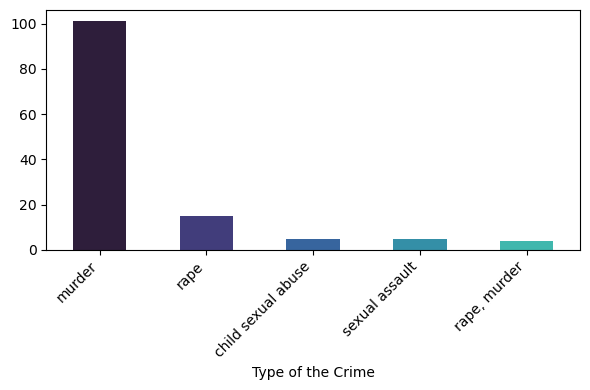

In [117]:
plt.figure(figsize=(6, 4))
c = sns.color_palette('mako')

(
    wrongCon_df
    .groupby(['Type of the Crime']) 
    ['Type of the Crime'] 
    .count()  
    .sort_values(ascending= False)  
    .head()
    .plot(kind='bar', color=c) 
)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Most number of convictions for type of crime was murder at 101. I can see if they were exonerated for the crime of murder

In [118]:
(
    wrongCon_df
    .groupby(['Type of the Crime','Legally Exonerated'])
    ['Type of the Crime']
    .get_group(('murder','yes'))
    .count()
    
)

80

Plot to show exonerated for murder yes vs no

Text(0.5, 1.0, 'Exonerated for the Crime for Murders')

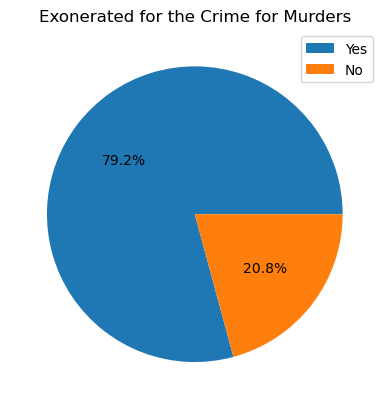

In [119]:
(
    wrongCon_df[wrongCon_df['Type of the Crime'] == 'murder']
    ['Legally Exonerated']
    .value_counts()
    .plot(kind='pie',autopct='%1.1f%%',labels=['', ''])
    
)

plt.legend(['Yes', 'No'], loc='best') 
plt.ylabel(None)
plt.title('Exonerated for the Crime for Murders')

##### Defendants by states 

In [120]:
(
    wrongCon_df
    .groupby(['Location of the Crime'])
    ['Location of the Crime']
    .count()
    .sort_values(ascending = False)
    .head(10)
    .to_frame()
    .rename(columns={'index':'', 'Location of the Crime': 'Crimes Count'})
)

,Crimes Count
Location of the Crime,
Illinois,19
Texas,17
New York,16
California,10
North Carolina,9
Florida,8
Massachusetts,7
Michigan,7
Georgia,6


##### Defendants that are legally exonerated  

Text(0.5, 1.0, 'Exonerated for the Crime')

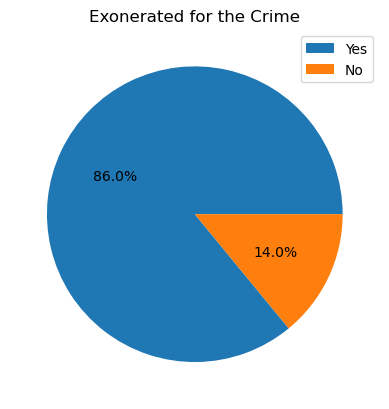

In [121]:
(
    wrongCon_df['Legally Exonerated']
    .value_counts()
    .plot(kind='pie',autopct='%1.1f%%',labels=['', ''])
    
)

plt.legend(['Yes', 'No'], loc='best') 
plt.ylabel(None)
plt.title('Exonerated for the Crime')

##### Crime Date over the years 

The data that I will plot is starting from year 1970. Not many wrongful convictions crimes conviction are shown before that. 

First year of the crime that was/were a wrongful conviction

In [122]:
(
    wrongCon_df['Date of the Crime']
    .min()
    )

1805

Result 

Although it showing 1805 but is that really true?

In [123]:
(
    wrongCon_df
    .loc[wrongCon_df['Date of the Crime']
    .idxmin()]
    .to_frame()
    .T
    )

,Unnamed: 0,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
0,0,1805,Dominic Daley and James Halligan,murder,Massachusetts,death,yes,1


First ever wrongful conviction 

Dominic Daley and James Halligan were two individuals who were wrongfully convicted and executed for murder in 1806 in Massachusetts, United States. They were Irish immigrants accused of the murder of Marcus Lyon, a farmer from Massachusetts. Daley and Halligan maintained their innocence throughout the trial, but they were convicted based on circumstantial evidence and racial bias against Irish immigrants. Their case drew significant attention and controversy, as doubts about their guilt emerged after their execution. Eventually, in 1984, their convictions were posthumously overturned by the Governor of Massachusetts, with an acknowledgment that they were innocent. The case of Dominic Daley and James Halligan stands as a tragic example of wrongful conviction and the importance of ensuring a fair and just legal system.

<Axes: xlabel='Date of the Crime'>

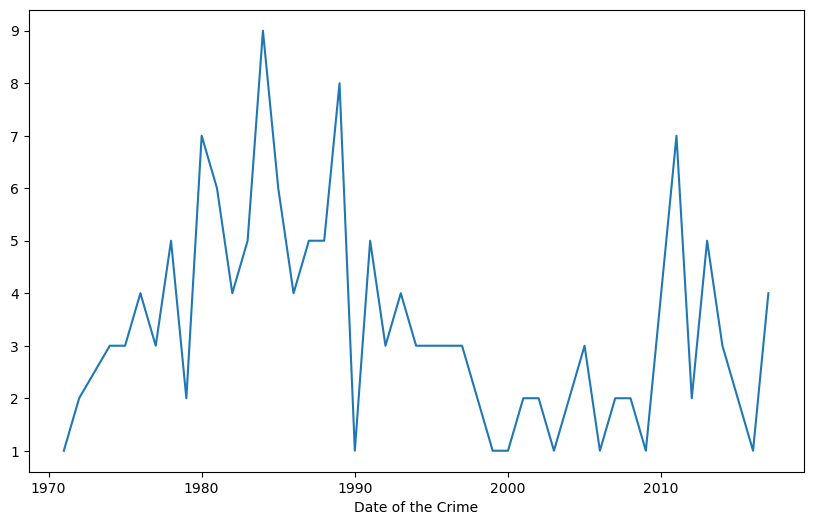

In [124]:
plt.figure(figsize=(10, 6))
(
    wrongCon_df[wrongCon_df['Date of the Crime']> 1970]
    .groupby(['Date of the Crime'])
    ['Type of the Crime']
    .count()
    .plot()
)